# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import spacy
from spacy import displacy
from tqdm import tqdm
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Read Dataset

In [3]:
data1 = pd.read_csv("D:/NLP/Project/dataset.csv")
data1.head(20)

,Unnamed: 0,input,target
0,0,New and new technology has been introduced to...,New technology has been introduced to society .
1,1,New and new technology has been introduced to...,New technology has been introduced into the so...
2,2,New and new technology has been introduced to...,Newer and newer technology has been introduced...
3,3,New and new technology has been introduced to...,Newer and newer technology has been introduced...
4,4,One possible outcome is that an environmental...,One possible outcome is that an environmentall...
5,5,One possible outcome is that an environmental...,One possible outcome is that an environmentall...
6,6,One possible outcome is that an environmental...,One possible outcome is that an environmentall...
7,7,One possible outcome is that an environmental...,One possible outcome is that an environmentall...
8,8,"Every person needs to know a bit about math ,...","Every person needs to know a bit about math , ..."
9,9,"Every person needs to know a bit about math ,...","Every person needs to know a bit about math , ..."


In [4]:
df1 = pd.DataFrame(data1['input'])
df2 = pd.DataFrame(data1['target'])

In [5]:
df1.insert(1, 'Target', 0, True)
df2.insert(1, 'Target', 1, True )

In [6]:
df2.rename(columns = {'target': 'input'}, inplace = True)

In [7]:
df1.head()

,input,Target
0,New and new technology has been introduced to...,0
1,New and new technology has been introduced to...,0
2,New and new technology has been introduced to...,0
3,New and new technology has been introduced to...,0
4,One possible outcome is that an environmental...,0


In [8]:
df2.head()

,input,Target
0,New technology has been introduced to society .,1
1,New technology has been introduced into the so...,1
2,Newer and newer technology has been introduced...,1
3,Newer and newer technology has been introduced...,1
4,One possible outcome is that an environmentall...,1


In [9]:
dff = pd.concat([df1, df2], axis = 0)
print(len(dff))

12008


In [10]:
dff.dtypes

input     object
Target     int64
dtype: object

In [11]:
# Make mask to check if have Missing values.
mask = dff.isnull().any(axis = 1)
data_cleaning = dff[~mask]

In [12]:
print(len(dff))
print(len(data_cleaning))

12008
12008


In [13]:
# Splitting dataset to input and output.
data_input = dff['input']
data_output = dff['Target']
data_input.head()

0     New and new technology has been introduced to...
1     New and new technology has been introduced to...
2     New and new technology has been introduced to...
3     New and new technology has been introduced to...
4     One possible outcome is that an environmental...
Name: input, dtype: object

In [14]:
# Show the output.
data_output.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [15]:
import numpy as np
data_input = np.array(data_input)
X_array=data_input.copy()
data_output = np.array(data_output)

In [16]:
print(data_input[0])
print(data_input[6004])

 New and new technology has been introduced to the society .
New technology has been introduced to society .


# Word Tokenization

In [17]:
def word_tokenization(data) :
    Tokens_list = []
    for sentence in tqdm(data) :
         for word in sentence :
            Tokens_list.append(word_tokenize(word))
    return Tokens_list

# Removing Punctuation

In [18]:
def remove_punc(data) :
    for sentence in tqdm(data) :
        for word in sentence :
            if word in punctuation:
                sentence.remove(word)
    return data

# Removing Stopwords

In [19]:
def remove_stopwords(data) :
    stop_words = stopwords.words('english')
    for sentence in tqdm(data):
         for word in sentence :
            if word in stop_words:
                    sentence.remove(word)
    return data

# POS Tagging

In [20]:
def pos_tagging(data) :
    POS_Tags=[]
    for sentence in tqdm(data):
        POS_Tags.append(nltk.pos_tag(sentence))
    return POS_Tags

# Porter Stemmer

In [21]:
def porter_stemmer(data) :
    PS=PorterStemmer()
    PS_Stemmer=[]
    for sentence in tqdm(data):
        for word in sentence:
            word=(PS.stem(word))
        PS_Stemmer.append(sentence)
    return PS_Stemmer

# Snowball Stemmer

In [22]:
def snowball_stemmer(data) :
    Snow=SnowballStemmer("english")
    Snow_Stemmer=[]
    for sentence in tqdm(data):
        for word in sentence:
            word=(Snow.stem(word))
        Snow_Stemmer.append(sentence)
    return Snow_Stemmer

# Lancaster Stemmer 

In [23]:
def lancaster_stemmer(data) :
    LS=LancasterStemmer()
    LS_Stemmer=[]
    for sentence in tqdm(data):
        for word in sentence:
            word=(LS.stem(word))
        LS_Stemmer.append(sentence)
    return LS_Stemmer

# Lemmatizer

In [24]:
def lemmatizer (data) :
    Lemmatizer=WordNetLemmatizer()
    Lemma=[]
    for sentence in tqdm(data):
        for word in sentence:
            word=(Lemmatizer.lemmatize(word))
        Lemma.append(sentence)
    return Lemma

# Preprocessing

In [25]:
# Data balancing
import imblearn
from collections import Counter
import numpy as np
data_input=np.array(data_input)
from imblearn.over_sampling import RandomOverSampler 
ROS = RandomOverSampler()
print('Original dataset shape %s' % Counter(data_output))
data_input, data_output = ROS.fit_resample(data_input.reshape(-1,1),data_output)
print('After undersample dataset shape %s' % Counter(data_output))

Original dataset shape Counter({0: 6004, 1: 6004})
After undersample dataset shape Counter({0: 6004, 1: 6004})


In [26]:
data_input

array([[' New and new technology has been introduced to the society .'],
       [' New and new technology has been introduced to the society .'],
       [' New and new technology has been introduced to the society .'],
       ...,
       ['While the communities in general have reckoned that they need support from young people , they must have made their appeal in a reasonable way . '],
       ['While the communities in general have recognized that they need support from the young people , they must make an appeal for it in a reasonable way . '],
       ['While the communities in general believe that they need support from the young people , they must make an appeal for it in a reasonable way . ']],
      dtype=object)

In [27]:
data_tokens=word_tokenization(data_input)

100%|█████████████████████████████████████████████████████████████████████████| 12008/12008 [00:00<00:00, 12416.87it/s]


In [28]:
data_tokens

[['New',
  'and',
  'new',
  'technology',
  'has',
  'been',
  'introduced',
  'to',
  'the',
  'society',
  '.'],
 ['New',
  'and',
  'new',
  'technology',
  'has',
  'been',
  'introduced',
  'to',
  'the',
  'society',
  '.'],
 ['New',
  'and',
  'new',
  'technology',
  'has',
  'been',
  'introduced',
  'to',
  'the',
  'society',
  '.'],
 ['New',
  'and',
  'new',
  'technology',
  'has',
  'been',
  'introduced',
  'to',
  'the',
  'society',
  '.'],
 ['One',
  'possible',
  'outcome',
  'is',
  'that',
  'an',
  'environmentally-induced',
  'reduction',
  'in',
  'motorization',
  'levels',
  'in',
  'the',
  'richer',
  'countries',
  'will',
  'outweigh',
  'any',
  'rise',
  'in',
  'motorization',
  'levels',
  'in',
  'the',
  'poorer',
  'countries',
  '.'],
 ['One',
  'possible',
  'outcome',
  'is',
  'that',
  'an',
  'environmentally-induced',
  'reduction',
  'in',
  'motorization',
  'levels',
  'in',
  'the',
  'richer',
  'countries',
  'will',
  'outweigh',
  '

In [29]:
data_without_punc=remove_stopwords(data_tokens)

100%|█████████████████████████████████████████████████████████████████████████| 12008/12008 [00:00<00:00, 68393.07it/s]


In [30]:
data_without_punc

[['New', 'new', 'technology', 'been', 'introduced', 'the', 'society', '.'],
 ['New', 'new', 'technology', 'been', 'introduced', 'the', 'society', '.'],
 ['New', 'new', 'technology', 'been', 'introduced', 'the', 'society', '.'],
 ['New', 'new', 'technology', 'been', 'introduced', 'the', 'society', '.'],
 ['One',
  'possible',
  'outcome',
  'that',
  'environmentally-induced',
  'reduction',
  'motorization',
  'levels',
  'the',
  'richer',
  'countries',
  'outweigh',
  'rise',
  'motorization',
  'levels',
  'the',
  'poorer',
  'countries',
  '.'],
 ['One',
  'possible',
  'outcome',
  'that',
  'environmentally-induced',
  'reduction',
  'motorization',
  'levels',
  'the',
  'richer',
  'countries',
  'outweigh',
  'rise',
  'motorization',
  'levels',
  'the',
  'poorer',
  'countries',
  '.'],
 ['One',
  'possible',
  'outcome',
  'that',
  'environmentally-induced',
  'reduction',
  'motorization',
  'levels',
  'the',
  'richer',
  'countries',
  'outweigh',
  'rise',
  'motor

In [31]:
data_without_stopword=remove_stopwords(data_tokens)

100%|█████████████████████████████████████████████████████████████████████████| 12008/12008 [00:00<00:00, 70477.12it/s]


In [32]:
data_without_stopword

[['New', 'new', 'technology', 'introduced', 'society', '.'],
 ['New', 'new', 'technology', 'introduced', 'society', '.'],
 ['New', 'new', 'technology', 'introduced', 'society', '.'],
 ['New', 'new', 'technology', 'introduced', 'society', '.'],
 ['One',
  'possible',
  'outcome',
  'environmentally-induced',
  'reduction',
  'motorization',
  'levels',
  'richer',
  'countries',
  'outweigh',
  'rise',
  'motorization',
  'levels',
  'poorer',
  'countries',
  '.'],
 ['One',
  'possible',
  'outcome',
  'environmentally-induced',
  'reduction',
  'motorization',
  'levels',
  'richer',
  'countries',
  'outweigh',
  'rise',
  'motorization',
  'levels',
  'poorer',
  'countries',
  '.'],
 ['One',
  'possible',
  'outcome',
  'environmentally-induced',
  'reduction',
  'motorization',
  'levels',
  'richer',
  'countries',
  'outweigh',
  'rise',
  'motorization',
  'levels',
  'poorer',
  'countries',
  '.'],
 ['One',
  'possible',
  'outcome',
  'environmentally-induced',
  'reduction'

In [33]:
POS_data=pos_tagging(data_tokens)

100%|██████████████████████████████████████████████████████████████████████████| 12008/12008 [00:07<00:00, 1596.09it/s]


In [34]:
POS_data

[[('New', 'NNP'),
  ('new', 'JJ'),
  ('technology', 'NN'),
  ('introduced', 'VBN'),
  ('society', 'NN'),
  ('.', '.')],
 [('New', 'NNP'),
  ('new', 'JJ'),
  ('technology', 'NN'),
  ('introduced', 'VBN'),
  ('society', 'NN'),
  ('.', '.')],
 [('New', 'NNP'),
  ('new', 'JJ'),
  ('technology', 'NN'),
  ('introduced', 'VBN'),
  ('society', 'NN'),
  ('.', '.')],
 [('New', 'NNP'),
  ('new', 'JJ'),
  ('technology', 'NN'),
  ('introduced', 'VBN'),
  ('society', 'NN'),
  ('.', '.')],
 [('One', 'CD'),
  ('possible', 'JJ'),
  ('outcome', 'NN'),
  ('environmentally-induced', 'JJ'),
  ('reduction', 'NN'),
  ('motorization', 'NN'),
  ('levels', 'NNS'),
  ('richer', 'VBP'),
  ('countries', 'NNS'),
  ('outweigh', 'VBP'),
  ('rise', 'NN'),
  ('motorization', 'NN'),
  ('levels', 'NNS'),
  ('poorer', 'JJR'),
  ('countries', 'NNS'),
  ('.', '.')],
 [('One', 'CD'),
  ('possible', 'JJ'),
  ('outcome', 'NN'),
  ('environmentally-induced', 'JJ'),
  ('reduction', 'NN'),
  ('motorization', 'NN'),
  ('levels', '

In [35]:
PS_data=porter_stemmer(data_tokens)

100%|██████████████████████████████████████████████████████████████████████████| 12008/12008 [00:01<00:00, 8965.84it/s]


In [36]:
print(PS_data)

[['New', 'new', 'technology', 'introduced', 'society', '.'], ['New', 'new', 'technology', 'introduced', 'society', '.'], ['New', 'new', 'technology', 'introduced', 'society', '.'], ['New', 'new', 'technology', 'introduced', 'society', '.'], ['One', 'possible', 'outcome', 'environmentally-induced', 'reduction', 'motorization', 'levels', 'richer', 'countries', 'outweigh', 'rise', 'motorization', 'levels', 'poorer', 'countries', '.'], ['One', 'possible', 'outcome', 'environmentally-induced', 'reduction', 'motorization', 'levels', 'richer', 'countries', 'outweigh', 'rise', 'motorization', 'levels', 'poorer', 'countries', '.'], ['One', 'possible', 'outcome', 'environmentally-induced', 'reduction', 'motorization', 'levels', 'richer', 'countries', 'outweigh', 'rise', 'motorization', 'levels', 'poorer', 'countries', '.'], ['One', 'possible', 'outcome', 'environmentally-induced', 'reduction', 'motorization', 'levels', 'richer', 'countries', 'outweigh', 'rise', 'motorization', 'levels', 'poorer'

In [37]:
Snow_data=snowball_stemmer(data_tokens)

100%|█████████████████████████████████████████████████████████████████████████| 12008/12008 [00:00<00:00, 14929.87it/s]


In [38]:
Snow_data

[['New', 'new', 'technology', 'introduced', 'society', '.'],
 ['New', 'new', 'technology', 'introduced', 'society', '.'],
 ['New', 'new', 'technology', 'introduced', 'society', '.'],
 ['New', 'new', 'technology', 'introduced', 'society', '.'],
 ['One',
  'possible',
  'outcome',
  'environmentally-induced',
  'reduction',
  'motorization',
  'levels',
  'richer',
  'countries',
  'outweigh',
  'rise',
  'motorization',
  'levels',
  'poorer',
  'countries',
  '.'],
 ['One',
  'possible',
  'outcome',
  'environmentally-induced',
  'reduction',
  'motorization',
  'levels',
  'richer',
  'countries',
  'outweigh',
  'rise',
  'motorization',
  'levels',
  'poorer',
  'countries',
  '.'],
 ['One',
  'possible',
  'outcome',
  'environmentally-induced',
  'reduction',
  'motorization',
  'levels',
  'richer',
  'countries',
  'outweigh',
  'rise',
  'motorization',
  'levels',
  'poorer',
  'countries',
  '.'],
 ['One',
  'possible',
  'outcome',
  'environmentally-induced',
  'reduction'

In [39]:
LS_data=lancaster_stemmer(data_tokens)

100%|█████████████████████████████████████████████████████████████████████████| 12008/12008 [00:01<00:00, 11182.35it/s]


In [40]:
LS_data

[['New', 'new', 'technology', 'introduced', 'society', '.'],
 ['New', 'new', 'technology', 'introduced', 'society', '.'],
 ['New', 'new', 'technology', 'introduced', 'society', '.'],
 ['New', 'new', 'technology', 'introduced', 'society', '.'],
 ['One',
  'possible',
  'outcome',
  'environmentally-induced',
  'reduction',
  'motorization',
  'levels',
  'richer',
  'countries',
  'outweigh',
  'rise',
  'motorization',
  'levels',
  'poorer',
  'countries',
  '.'],
 ['One',
  'possible',
  'outcome',
  'environmentally-induced',
  'reduction',
  'motorization',
  'levels',
  'richer',
  'countries',
  'outweigh',
  'rise',
  'motorization',
  'levels',
  'poorer',
  'countries',
  '.'],
 ['One',
  'possible',
  'outcome',
  'environmentally-induced',
  'reduction',
  'motorization',
  'levels',
  'richer',
  'countries',
  'outweigh',
  'rise',
  'motorization',
  'levels',
  'poorer',
  'countries',
  '.'],
 ['One',
  'possible',
  'outcome',
  'environmentally-induced',
  'reduction'

In [41]:
Lemma_data=lemmatizer(data_tokens)

100%|██████████████████████████████████████████████████████████████████████████| 12008/12008 [00:01<00:00, 8551.67it/s]


In [42]:
Lemma_data

[['New', 'new', 'technology', 'introduced', 'society', '.'],
 ['New', 'new', 'technology', 'introduced', 'society', '.'],
 ['New', 'new', 'technology', 'introduced', 'society', '.'],
 ['New', 'new', 'technology', 'introduced', 'society', '.'],
 ['One',
  'possible',
  'outcome',
  'environmentally-induced',
  'reduction',
  'motorization',
  'levels',
  'richer',
  'countries',
  'outweigh',
  'rise',
  'motorization',
  'levels',
  'poorer',
  'countries',
  '.'],
 ['One',
  'possible',
  'outcome',
  'environmentally-induced',
  'reduction',
  'motorization',
  'levels',
  'richer',
  'countries',
  'outweigh',
  'rise',
  'motorization',
  'levels',
  'poorer',
  'countries',
  '.'],
 ['One',
  'possible',
  'outcome',
  'environmentally-induced',
  'reduction',
  'motorization',
  'levels',
  'richer',
  'countries',
  'outweigh',
  'rise',
  'motorization',
  'levels',
  'poorer',
  'countries',
  '.'],
 ['One',
  'possible',
  'outcome',
  'environmentally-induced',
  'reduction'

In [43]:
data_input[0]

array([' New and new technology has been introduced to the society .'],
      dtype=object)

# Visualization Dataset Using Spacy

In [44]:
import numpy as np
import spacy
import string
nlp = spacy.load('en_core_web_sm')

text = str(data_input[0])
doc=nlp(text)
for token in doc:
    print(token.text, '=>', token.dep_,'=>',token.head.text)

[ => dep => introduced
' => punct => introduced
New => amod => technology
and => cc => New
new => conj => New
technology => nsubjpass => introduced
has => aux => introduced
been => auxpass => introduced
introduced => ROOT => introduced
to => prep => introduced
the => det => society
society => pobj => to
. => punct => introduced
' => punct => introduced
] => punct => introduced


In [45]:
# Make visualization to data to see relationship.
displacy.render(nlp(str(data_input[0])), jupyter = True, style = 'dep', options = {'distance': 90})

In [46]:
# See another way to visualization data.
displacy.render(nlp(str(data_input[0])), jupyter = True, style = 'dep', options = {'compact': True, 'bg': '#09a3d5',
                                                                           'distance': 90, 'color': 'white',
                                                                           'font': 'Pacifico Regular'
                                                                           })

In [47]:
# Use another way to visulaize data about using NER.
text = str(data_input[101])
doc = nlp(text)

displacy.render(doc, style = 'ent', jupyter = True)

In [48]:
text = str(data_input[100])
doc = nlp(text)

displacy.render(doc, style = 'dep', jupyter = True, options = {'distance': 60})

# Actual Preprocessing

In [49]:
final_data=[]
for sentence in PS_data:
        x = ' '.join(sentence)
        final_data.append(x)

In [50]:
np.array(final_data).shape

(12008,)

In [51]:
final_data

['New new technology introduced society .',
 'New new technology introduced society .',
 'New new technology introduced society .',
 'New new technology introduced society .',
 'One possible outcome environmentally-induced reduction motorization levels richer countries outweigh rise motorization levels poorer countries .',
 'One possible outcome environmentally-induced reduction motorization levels richer countries outweigh rise motorization levels poorer countries .',
 'One possible outcome environmentally-induced reduction motorization levels richer countries outweigh rise motorization levels poorer countries .',
 'One possible outcome environmentally-induced reduction motorization levels richer countries outweigh rise motorization levels poorer countries .',
 'Every person needs know bit math , sciences , arts , literature history order stand society .',
 'Every person needs know bit math , sciences , arts , literature history order stand society .',
 'Every person needs know bit ma

# N-Gram Vectorizer

In [52]:
# Create a countVectorizer object 
count_vect_bon = CountVectorizer(ngram_range=(1,3))
#Build a BON representation for the corpus
data_input = count_vect_bon.fit_transform(final_data)
print(data_input.shape)
#Look at the vocabulary mapping
# print("Our vocabulary: ", count_vect_bon.vocabulary_)



(12008, 47102)


# TF-IDF Vectorizer

In [53]:
tfidf_vec = TfidfVectorizer()
tfidf_vec_fit = tfidf_vec.fit(final_data)
x_data = tfidf_vec.fit_transform(final_data)
print(x_data.toarray().shape)
print("Our vocabulary: ",  tfidf_vec.vocabulary_)

(12008, 4738)
Our vocabulary:  {'new': 2833, 'technology': 4168, 'introduced': 2312, 'society': 3844, 'one': 2925, 'possible': 3187, 'outcome': 2969, 'environmentally': 1524, 'induced': 2240, 'reduction': 3459, 'motorization': 2775, 'levels': 2485, 'richer': 3586, 'countries': 1004, 'outweigh': 2976, 'rise': 3598, 'poorer': 3169, 'every': 1564, 'person': 3083, 'needs': 2826, 'know': 2400, 'bit': 508, 'math': 2641, 'sciences': 3683, 'arts': 307, 'literature': 2517, 'history': 2095, 'order': 2948, 'stand': 3958, 'while': 4639, 'travel': 4367, 'company': 854, 'likely': 2500, 'show': 3779, 'interesting': 2298, 'sites': 3810, 'customers': 1060, 'advertise': 123, 'family': 1677, 'friends': 1840, 'highly': 2085, 'unlikely': 4473, 'tell': 4180, 'included': 2216, 'tour': 4331, 'example': 1578, 'due': 1346, 'entrance': 1518, 'fees': 1713, 'would': 4703, 'make': 2597, 'total': 4324, 'package': 2995, 'price': 3260, 'overly': 2980, 'expensive': 1606, 'disadvantage': 1250, 'parking': 3016, 'car': 64

# Splitting Dataset

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_input, data_output,test_size = 0.20, random_state = 42)


In [55]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9606, 47102)
(9606,)
(2402, 47102)
(2402,)


# ML Models

In [56]:
# Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_LogisticRegression= accuracy_score(y_test, y_pred)
report_LogisticRegression = classification_report(y_test, y_pred)
matrix_LogisticRegression = confusion_matrix(y_test, y_pred)
print('Test accuracy:', accuracy_LogisticRegression)
print('Confusion matrix:\n', matrix_LogisticRegression)
print('Classification report:\n', report_LogisticRegression)


Test accuracy: 0.7510407993338885
Confusion matrix:
 [[986 247]
 [351 818]]
Classification report:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77      1233
           1       0.77      0.70      0.73      1169

    accuracy                           0.75      2402
   macro avg       0.75      0.75      0.75      2402
weighted avg       0.75      0.75      0.75      2402



In [57]:
# Bernoulli naive bayes model 
model=BernoulliNB(binarize=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_BernoulliNB = accuracy_score(y_test, y_pred)
report_BernoulliNB = classification_report(y_test, y_pred)
matrix_BernoulliNB = confusion_matrix(y_test, y_pred)
print('Test accuracy:', accuracy_BernoulliNB)
print('Confusion matrix:\n', matrix_BernoulliNB)
print('Classification report:\n', matrix_BernoulliNB)

Test accuracy: 0.48501248959200666
Confusion matrix:
 [[  88 1145]
 [  92 1077]]
Classification report:
 [[  88 1145]
 [  92 1077]]


In [58]:
# Multinomial naive bayes model
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_MultinomialNB = accuracy_score(y_test, y_pred)
report_MultinomialNB = classification_report(y_test, y_pred)
matrix_MultinomialNB = confusion_matrix(y_test, y_pred)
print('Test accuracy:', accuracy_MultinomialNB)
print('Confusion matrix:\n', matrix_MultinomialNB)
print('Classification report:\n', report_MultinomialNB)

Test accuracy: 0.6194837635303914
Confusion matrix:
 [[837 396]
 [518 651]]
Classification report:
               precision    recall  f1-score   support

           0       0.62      0.68      0.65      1233
           1       0.62      0.56      0.59      1169

    accuracy                           0.62      2402
   macro avg       0.62      0.62      0.62      2402
weighted avg       0.62      0.62      0.62      2402



In [59]:
#KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_KNeighborsClassifier= accuracy_score(y_test, y_pred)
report_KNeighborsClassifier = classification_report(y_test, y_pred)
matrix_KNeighborsClassifier = confusion_matrix(y_test, y_pred)
print('Test accuracy:', accuracy_KNeighborsClassifier)
print('Confusion matrix:\n', matrix_KNeighborsClassifier)
print('Classification report:\n', report_KNeighborsClassifier)

Test accuracy: 0.5
Confusion matrix:
 [[783 450]
 [751 418]]
Classification report:
               precision    recall  f1-score   support

           0       0.51      0.64      0.57      1233
           1       0.48      0.36      0.41      1169

    accuracy                           0.50      2402
   macro avg       0.50      0.50      0.49      2402
weighted avg       0.50      0.50      0.49      2402



In [60]:
# XGB model
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_XGBClassifier = accuracy_score(y_test, y_pred)
report_XGBClassifier = classification_report(y_test, y_pred)
matrix_XGBClassifier = confusion_matrix(y_test, y_pred)
print('Test accuracy:', accuracy_XGBClassifier)
print('Confusion matrix:\n', matrix_XGBClassifier)
print('Classification report:\n', report_XGBClassifier)

Test accuracy: 0.5512073272273106
Confusion matrix:
 [[766 467]
 [611 558]]
Classification report:
               precision    recall  f1-score   support

           0       0.56      0.62      0.59      1233
           1       0.54      0.48      0.51      1169

    accuracy                           0.55      2402
   macro avg       0.55      0.55      0.55      2402
weighted avg       0.55      0.55      0.55      2402



In [61]:
#DT model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_DecisionTreeClassifier = accuracy_score(y_test, y_pred)
report_DecisionTreeClassifier = classification_report(y_test, y_pred)
matrix_DecisionTreeClassifier = confusion_matrix(y_test, y_pred)
print('Test accuracy:', accuracy_DecisionTreeClassifier)
print('Confusion matrix:\n', matrix_DecisionTreeClassifier)
print('Classification report:\n', report_DecisionTreeClassifier)

Test accuracy: 0.7439633638634471
Confusion matrix:
 [[1098  135]
 [ 480  689]]
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.89      0.78      1233
           1       0.84      0.59      0.69      1169

    accuracy                           0.74      2402
   macro avg       0.77      0.74      0.74      2402
weighted avg       0.76      0.74      0.74      2402



In [62]:
#SVM model
model = SVC(kernel = 'poly', degree = 5, random_state = 42, C = 50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_SVC = accuracy_score(y_test, y_pred)
report_SVC = classification_report(y_test, y_pred)
matrix_SVC = confusion_matrix(y_test, y_pred)
print('Test accuracy:', accuracy_SVC)
print('Confusion matrix:\n', matrix_SVC)
print('Classification report:\n', report_SVC)

Test accuracy: 0.7593671940049959
Confusion matrix:
 [[933 300]
 [278 891]]
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.76      1233
           1       0.75      0.76      0.76      1169

    accuracy                           0.76      2402
   macro avg       0.76      0.76      0.76      2402
weighted avg       0.76      0.76      0.76      2402



In [63]:
# Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_GradientBoostingClassifier = accuracy_score(y_test, y_pred)
report_GradientBoostingClassifier = classification_report(y_test, y_pred)
matrix_GradientBoostingClassifier = confusion_matrix(y_test, y_pred)
print('Test accuracy:', accuracy_GradientBoostingClassifier)
print('Confusion matrix:\n', matrix_GradientBoostingClassifier)
print('Classification report:\n', report_GradientBoostingClassifier)

Test accuracy: 0.5395503746877602
Confusion matrix:
 [[ 200 1033]
 [  73 1096]]
Classification report:
               precision    recall  f1-score   support

           0       0.73      0.16      0.27      1233
           1       0.51      0.94      0.66      1169

    accuracy                           0.54      2402
   macro avg       0.62      0.55      0.47      2402
weighted avg       0.63      0.54      0.46      2402



In [64]:
#Random Forest model
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_RandomForestClassifier = accuracy_score(y_test, y_pred)
report_RandomForestClassifier = classification_report(y_test, y_pred)
matrix_RandomForestClassifier = confusion_matrix(y_test, y_pred)
print('Test accuracy:', accuracy_RandomForestClassifier)
print('Confusion matrix:\n', matrix_RandomForestClassifier)
print('Classification report:\n', report_RandomForestClassifier)

Test accuracy: 0.7681099084096586
Confusion matrix:
 [[1029  204]
 [ 353  816]]
Classification report:
               precision    recall  f1-score   support

           0       0.74      0.83      0.79      1233
           1       0.80      0.70      0.75      1169

    accuracy                           0.77      2402
   macro avg       0.77      0.77      0.77      2402
weighted avg       0.77      0.77      0.77      2402



In [88]:
y_pred[0:100]

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

# ML models Comparison

<Axes: xlabel='Algorithm', ylabel='Accuracy Score'>

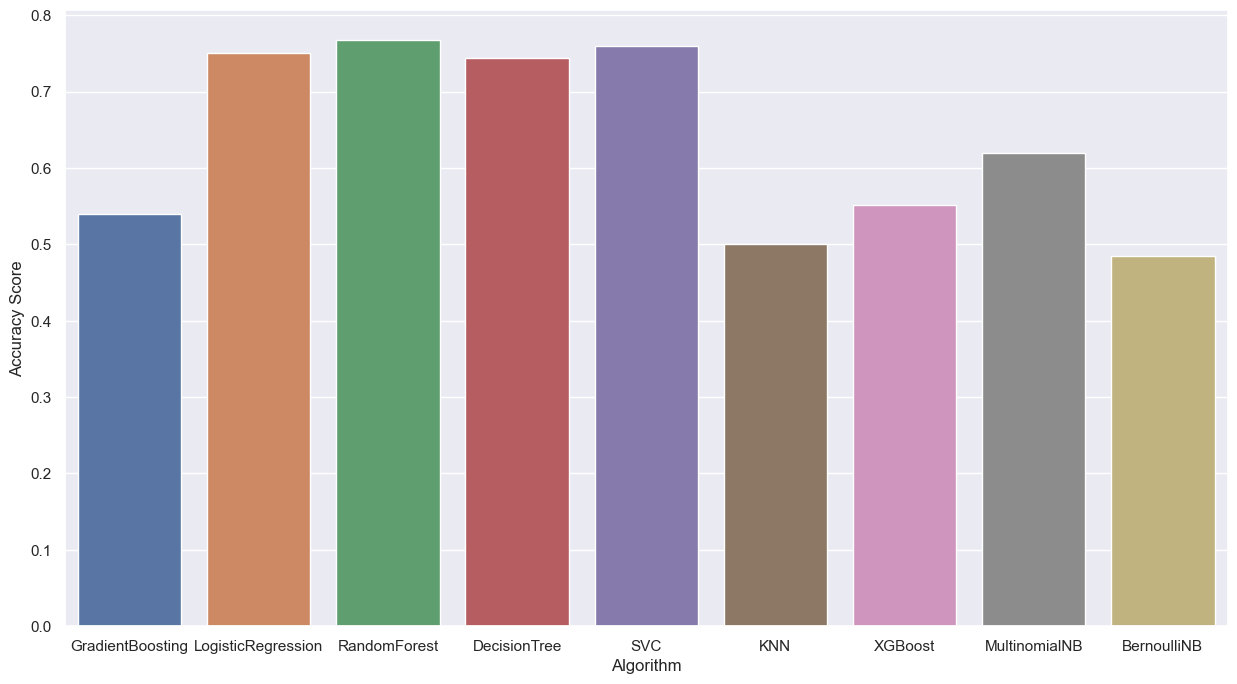

In [65]:
scores=[accuracy_GradientBoostingClassifier,accuracy_LogisticRegression,accuracy_RandomForestClassifier,accuracy_DecisionTreeClassifier,accuracy_SVC,accuracy_KNeighborsClassifier,accuracy_XGBClassifier,accuracy_MultinomialNB,accuracy_BernoulliNB]
# Create a dataframe with the algorithm names and their scores
algorithms = ['GradientBoosting','LogisticRegression','RandomForest','DecisionTree','SVC', 'KNN', 'XGBoost','MultinomialNB','BernoulliNB']

df = pd.DataFrame({'Algorithm': algorithms, 'Accuracy Score': scores})

# Set the figure size and labels
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
# Create the barplot
sns.barplot(x='Algorithm', y='Accuracy Score', data=df)

# T5 transformer 

In [66]:
from happytransformer import  HappyTextToText

In [67]:
happy_tt = HappyTextToText("T5", "vennify/t5-base-grammar-correction")


05/09/2023 20:23:16 - INFO - happytransformer.happy_transformer -   Using model: cpu


In [68]:
from happytransformer import TTSettings

beam_settings =  TTSettings(num_beams=5, min_length=1, max_length=100)

# Test Machine Learning And Transfer Learning Model

In [123]:

text = ' John is play football'
l=[]
l.append([text])
tokens= word_tokenization(l)
p=porter_stemmer(tokens)
l=[]
for sentence in p:
        x = ' '.join(sentence)
        l.append(x)

count_vect_bon = CountVectorizer(ngram_range=(1,3))
fit= count_vect_bon.fit(final_data)
X = fit.transform(p[0])
dft = pd.DataFrame(X.toarray(), columns = count_vect_bon.get_feature_names_out())
pred = model.predict(dft)
output_text = happy_tt.generate_text("grammar: "+text, args=beam_settings)

if pred[0] == 1:
    print('The text is right : ' + text)
else:
    print('The text is wrong and the correction is: ' + output_text.text)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


The text is wrong and the correction is: John is playing football.


In [124]:
text = 'Learning is an ongoing part of life'
l=[]
l.append([text])
tokens= word_tokenization(l)
p=porter_stemmer(tokens)
l=[]
for sentence in p:
        x = ' '.join(sentence)
        l.append(x)

count_vect_bon = CountVectorizer(ngram_range=(1,3))
fit= count_vect_bon.fit(final_data)
X = fit.transform(p[0])
dft = pd.DataFrame(X.toarray(), columns = count_vect_bon.get_feature_names_out())
pred = model.predict(dft)
output_text = happy_tt.generate_text("grammar: "+text, args=beam_settings)

if pred[0] == 1:
    print('The text is right : ' + text)
else:
    print('The text is wrong and the correction is: ' + output_text.text)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


The text is right : Learning is an ongoing part of life
